In [2]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [3]:
rnd = np.random.RandomState(42)

In [3]:
data_path = '/scratch/local1/Data/neural_nets/neural_assim/data/train_vr1.nc'
vr1 = xr.open_dataarray(data_path)

In [4]:
vr1_squeezed = vr1.sel(grid=0).squeeze()

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
STDDEV = 0.5

In [7]:
ens_random = (rnd.normal(0, STDDEV, size=(1000, *vr1_squeezed.shape)) + vr1_squeezed.values).T
sig_ens = sigmoid(0.5-5)

In [8]:
sig_mean = sig_ens.mean(axis=-1)
sig_std = sig_ens.std(axis=-1)

In [13]:
x_linspace = np.linspace(0, 1, 10000)
x_linspace_std = x_linspace * (1-x_linspace) * 0.25

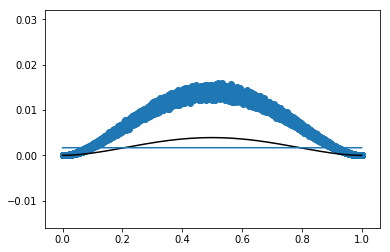

In [19]:
fig, ax = plt.subplots()
ax.scatter(sig_mean, sig_std**2)
ax.plot(x_linspace, x_linspace_std**2, c='k')
ax.plot(x_linspace, [sigmoid(-5)*0.25] * 10000)
plt.show()

In [12]:
test = rnd.normal(scale=0.5, size=10000)

In [18]:
((test-1).var()/3)

0.084074448165166

In [22]:
(test/3.67).std()

0.13684425697397057

In [17]:
((test-1)/3).var()

0.02802481605505533

In [16]:
0.5/3.67

0.1362397820163488

SyntaxError: invalid syntax (<ipython-input-15-c7226e9edbb6>, line 3)